         Name  Sex    Age     HR  Height  Weight      BP
0      Evelyn    F  60.00  67.00  168.00   60.00  106.00
1       Layla    F  12.00  87.00  156.00   47.00  142.00
2      Elijah    M  30.00  64.00  177.00   73.00  137.00
3     Madison    F  74.00  80.00  167.55   61.59  121.22
4     Michael    M  13.00  79.00  163.00   65.00  121.22
5   Alexander    M  43.00  66.00  171.00   62.00  124.00
6       James    M  65.00  67.00  167.55   61.59  124.00
7        Noah    M  30.00  77.00  181.00   68.00  121.22
8        Zoey    F  37.00  79.00  167.55   61.59  112.00
9       Riley    F  26.00  78.00  167.55   61.59  139.00
10     Harper    F  36.00  60.00  174.00   53.00  121.00
11     Joseph    M  42.00  78.12  168.00   70.00  110.00
12       Mila    F  48.00  78.12  164.00   48.00  139.00
13       Ella    F  10.00  80.00  168.00   67.00  137.00
14        Ava    F  70.00  66.00  165.00   63.00  121.22
15   Penelope    F  47.00  78.12  174.00   61.00  134.00
16      Emily    F  52.00  84.0

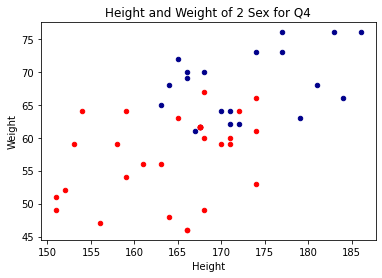

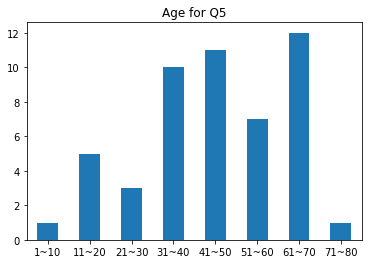

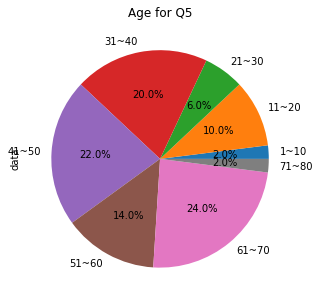

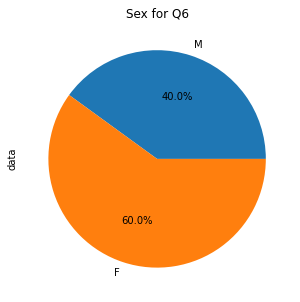

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


def my_merge(df1, df2):

    return pd.merge(
        left=df1,
        right=df2,
        how="outer",    # choose the all row that two df have
        on="name",      # combine two df through 'name' col
        indicator=False  # do not show where the row come from
    )


hw2_data = pd.read_csv("HW2_data.csv", sep=",",
                       names=['name', 'typename', 'data'])

sex_data = hw2_data[(hw2_data.typename == 'Sex')]
age_data = hw2_data[(hw2_data.typename == 'Age')]
hr_data = hw2_data[(hw2_data.typename == 'HR')]
height_data = hw2_data[(hw2_data.typename == 'Height')]
weight_data = hw2_data[(hw2_data.typename == 'Weight')]
bp_data = hw2_data[(hw2_data.typename == 'BP')]

result = my_merge(sex_data, age_data)
result = my_merge(result, hr_data)
result = my_merge(result, height_data)
result = my_merge(result, weight_data)
result = my_merge(result, bp_data)
result = result.drop(['typename_x', 'typename_y'], axis=1)

colname = ['Name', 'Sex', 'Age', 'HR', 'Height', 'Weight', 'BP']
result = result.set_axis(colname, axis=1, inplace=False)

for i in colname[2:]:
    result[i] = pd.to_numeric(result[i], errors='ignore')

for i in colname[2:]:
    result.loc['50', i] = result[i].mean(skipna=True)
    result[i] = result[i].fillna(result[i].mean(skipna=True))
result.loc['50', 'Name'] = 'Mean'

pd.set_option("display.precision", 2)
print(result)
print("Above result is for Q1 and Q2")
print("-----------------------------------------------")
for i in colname[2:]:
    print("max %s is %s %d"
          % (i, result.loc[result[i] == result[i].max(), 'Name'].values[0], result[i].max()))
print("Above result is for Q3")
print("-----------------------------------------------")

m_plot = result.loc[result['Sex'] == 'M'].plot.scatter(x='Height',
                                                       y='Weight',
                                                       c='DarkBlue')
f_plot = result.loc[result['Sex'] == 'F'].plot.scatter(x='Height',
                                                       y='Weight',
                                                       c='Red',
                                                       ax=m_plot,
                                                       title="Height and Weight of 2 Sex for Q4")
plt.show()
# ------------------------------------------------------
age_statstic = [0, 0, 0, 0, 0, 0, 0, 0]
for i in result["Age"][0:50]:
    if (1 <= int(i) < 11):
        age_statstic[0] += 1
    elif (11 <= int(i) < 21):
        age_statstic[1] += 1
    elif (21 <= int(i) < 31):
        age_statstic[2] += 1
    elif (31 <= int(i) < 41):
        age_statstic[3] += 1
    elif (41 <= int(i) < 51):
        age_statstic[4] += 1
    elif (51 <= int(i) < 61):
        age_statstic[5] += 1
    elif (61 <= int(i) < 71):
        age_statstic[6] += 1
    else:
        age_statstic[7] += 1

age_df = pd.DataFrame({'data': age_statstic},
                      index=['1~10', '11~20', '21~30', '31~40', '41~50', '51~60', '61~70', '71~80'])
age_barplot = age_df.plot.bar(
    y='data', rot=0, legend=False, title="Age for Q5")
plt.show()
# ------------------------------------------------------
age_pieplot = age_df.plot.pie(y='data', figsize=(5, 5),
                                autopct='%1.1f%%', legend=False, title="Age for Q5")
plt.show()
# ------------------------------------------------------
sex_df = pd.DataFrame({'data': [result.loc[result["Sex"] == 'M'].count()["Name"], result.loc[result["Sex"] == 'F'].count()["Name"]]},
                      index=['M', 'F'])
sex_pieplot = sex_df.plot.pie(y='data', figsize=(5, 5),
                                autopct='%1.1f%%', legend=False, title="Sex for Q6")
plt.show()
